## Customer's Segmentation

##### Problem -->Customer Segmentation Analysis with Python

## Content

#### Mall customers dataset:

#### Genre:

- This column represents the gender of the mall customers. It can have two possible values, typically 'Male' or 'Female', indicating the gender of the individual.
  
#### Age:

- The 'Age' column contains the age of each mall customer. It is a numerical value that represents the customer's age in years. The age of the customers is used to segment and analyze different age groups for targeted marketing and understanding customer preferences based on age.
- 
#### Annual Income (k$):

- The 'Annual Income' column represents the annual income of each mall customer in thousands of dollars (k$). This is a numerical feature that reflects the customer's earning capacity or purchasing power.
  
#### Spending Score (1-100):

-  The 'Spending Score' column is a numerical attribute that quantifies the spending behavior of each mall customer on a scale from 1 to 100. The score is calculated based on various factors, such as the amount spent, frequency of visits, and types of purchases made. Higher scores indicate higher spending tendencies and vice versa.
  
- The combination of these columns in the dataset allows mall owners and marketers to perform various analyses to understand customer behavior and preferences. For instance, they can identify high-income individuals with high spending scores, specific age groups with certain spending patterns, or explore the relationship between age, income, and spending behavior to develop targeted marketing strategies. Additionally, this dataset can be used for customer segmentation, which can help tailor marketing campaigns and improve overall customer satisfaction.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

## Uploading DataSet

In [53]:
data=pd.read_csv('Mall_Customers.csv')
data=data.drop(['CustomerID'],axis=1)

### Categorical columns Convert into Numerical column 

- Converting categorical columns into numerical form is essential for machine learning algorithms as they require numerical data to perform calculations and operations. This transformation is achieved through techniques like label encoding and one-hot encoding. It allows for easier data processing, analysis, and visualization, enabling the development of effective machine learning models and data-driven insights. Care should be taken to choose the appropriate encoding method based on the nature of the categorical data and the specific requirements of the analysis or model.

In [54]:
def col_conversion(col):
    j=[]
    for i in col:
        if i=="Male":
            k=1
            j.append(k)
        if i=="Female":
            k=0
            j.append(k)
    return j
data['gender']=col_conversion(data['Gender'])
## After coversion it will drop categorical column
data=data.drop(['Gender'],axis=1)
data=data[['gender','Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
data.sample(5)

,gender,Age,Annual Income (k$),Spending Score (1-100)
82,1,67,54,41
174,0,52,88,13
182,1,46,98,15
57,1,69,44,46
130,1,47,71,9


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   gender                  200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


- The given input represents a DataFrame object from the Pandas library with 200 entries and 4 columns. The columns in the DataFrame are 'Gender', 'Age', 'Annual Income (k$)', and 'Spending Score (1-100)', all of which have non-null integer values (int64 data type). The DataFrame has a RangeIndex starting from 0 to 199, and its total memory usage is 6.4 KB.

In [56]:
data.isnull().any()

gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [57]:
print("Is there any duplicate value",data.duplicated().any())

Is there any duplicate value False


In [25]:
data.describe()

,gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


- The given output is the summary statistics obtained by applying the describe() function to the DataFrame named 'data'. It provides descriptive statistics for each numerical column in the DataFrame, including 'Gender', 'Age', 'Annual Income (k$)', and 'Spending Score (1-100)'. The statistics include the count, mean, standard deviation (std), minimum (min), 25th percentile (25%), 50th percentile (50% or median), 75th percentile (75%), and maximum (max) values for each column. These statistics offer valuable insights into the distribution and central tendencies of the data, helping to understand the characteristics of the dataset. For example, we can observe the average age of customers, the typical range of annual incomes, and the spread of spending scores across the customer base.

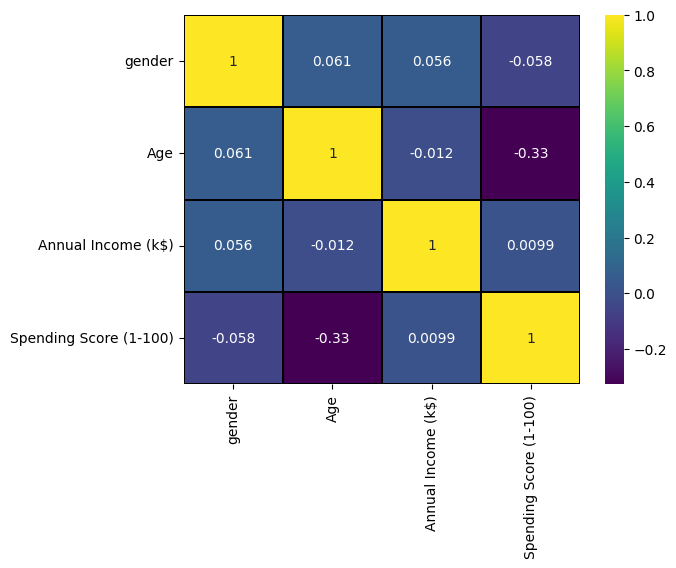

In [26]:
# Create a heatmap with 'viridis' colormap
sns.heatmap(data.corr(), linecolor='k', annot=True, linewidths=0.25, vmax=1.0, cmap='viridis')

# Show the plot
plt.show()

- The data.corr() output shows the correlation coefficients between different attributes in the DataFrame data.

In [27]:
data.skew()

gender                    0.243578
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

- The given output represents the skewness values for each numerical column in the DataFrame named 'data'. Skewness measures the asymmetry of the distribution of data points in a dataset. A skewness value of 0 indicates a symmetric distribution, positive skewness indicates a right-skewed (positively skewed) distribution, and negative skewness indicates a left-skewed (negatively skewed) distribution.

- The skewness values for each column are as follows:

- Gender: 0.243578
- Age: 0.485569
- Annual Income (k$): 0.321843
- Spending Score (1-100): -0.047220

#### Interpreting the skewness values:

- Gender has a positive skewness value, indicating a slight right-skewed distribution.
- Age also has a positive skewness value, indicating a slight right-skewed distribution.
- Annual Income (k$) has a positive skewness value, indicating a slight right-skewed distribution.
- Spending Score (1-100) has a nearly zero skewness value, indicating a nearly symmetric distribution.

- In summary, based on the skewness values, we can observe that the Gender, Age, and Annual Income (k$) columns have slightly right-skewed distributions, while the Spending Score (1-100) column is close to a symmetric distribution.

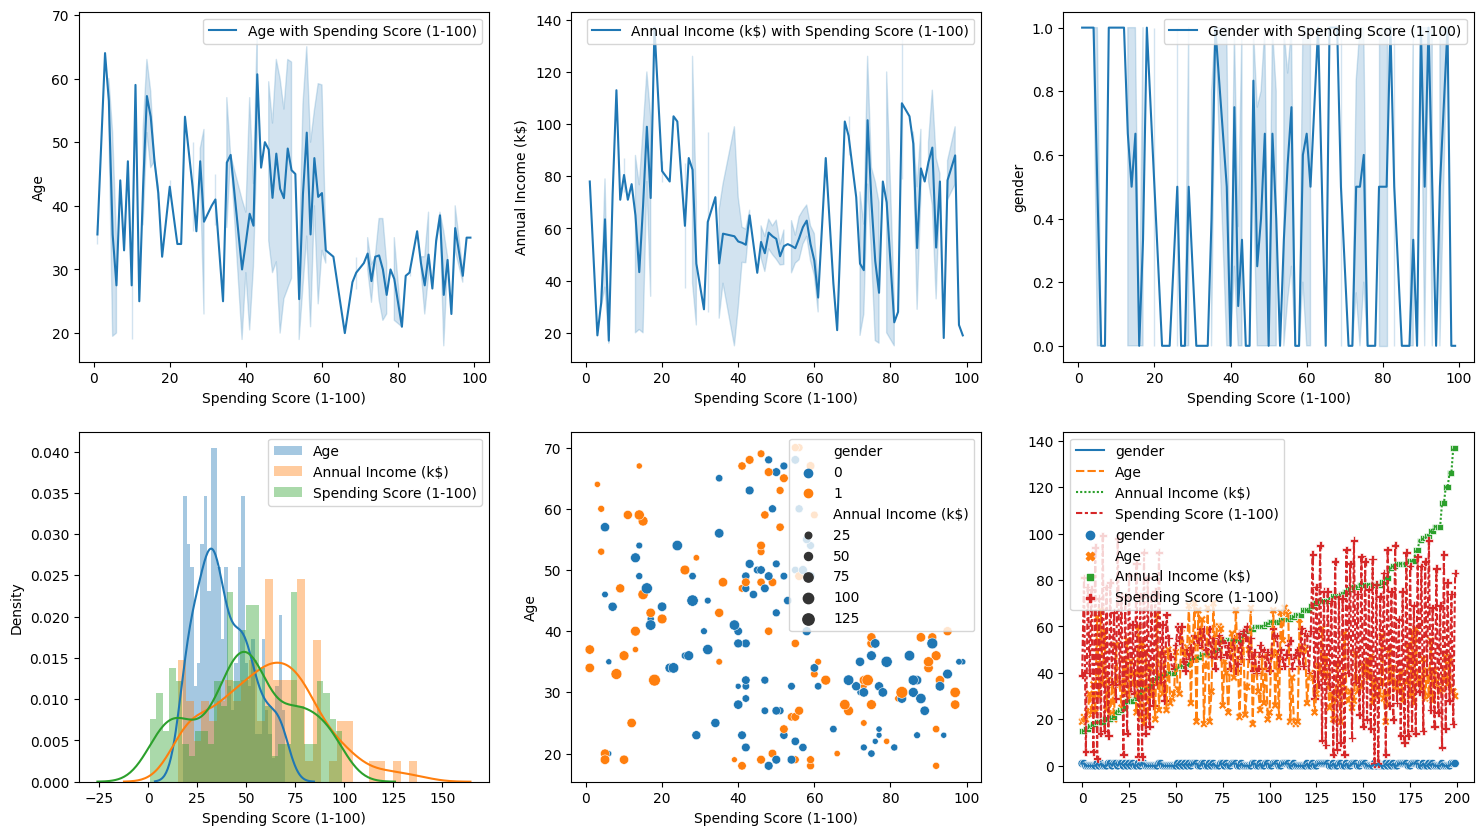

In [31]:
# Assuming you have a DataFrame 'data' with columns 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', and 'Gender'

# Create a 2x3 subplot grid (2 rows, 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Plot the first line with label 'Age with Spending Score (1-100)'
sns.lineplot(y=data['Age'], x=data['Spending Score (1-100)'], label='Age with Spending Score (1-100)', ax=axes[0, 0])

# Plot the second line with label 'Annual Income (k$) with Spending Score (1-100)'
sns.lineplot(y=data['Annual Income (k$)'], x=data['Spending Score (1-100)'], label='Annual Income (k$) with Spending Score (1-100)', ax=axes[0, 1])

# Plot the third line with label 'Gender with Spending Score (1-100)'
sns.lineplot(y=data['gender'], x=data['Spending Score (1-100)'], label='Gender with Spending Score (1-100)', ax=axes[0, 2])

# Plot the distribution of 'Age', 'Annual Income (k$)', and 'Spending Score (1-100)' in the fourth subplot
sns.distplot(data['Age'], bins=30, ax=axes[1, 0], label='Age')
sns.distplot(data['Annual Income (k$)'], bins=30, ax=axes[1, 0], label='Annual Income (k$)')
sns.distplot(data['Spending Score (1-100)'], bins=30, ax=axes[1, 0], label='Spending Score (1-100)')

# Plot the scatter plot in the fifth subplot
sns.scatterplot(y=data['Age'], x=data['Spending Score (1-100)'], hue=data['gender'], size=data['Annual Income (k$)'], ax=axes[1, 1])

# Plot line plot and scatter plot in the sixth subplot
sns.lineplot(data=data, ax=axes[1, 2])
sns.scatterplot(data=data, ax=axes[1, 2])

# Add the legend to display labels for the first three plots
axes[0, 0].legend()
axes[0, 1].legend()
axes[0, 2].legend()

# Add the legend to display labels for the fourth plot
axes[1, 0].legend()

# Add the legend to display labels for the scatter plot
axes[1, 1].legend()

# Show the plot
plt.show()


## Data Analysis

## Max/Min Spending Score from Male 

In [40]:
data[data['gender']==1].max()

gender                      1
Age                        70
Annual Income (k$)        137
Spending Score (1-100)     97
dtype: int64

In [42]:
data[data['gender']==1].min()

gender                     1
Age                       18
Annual Income (k$)        15
Spending Score (1-100)     1
dtype: int64

## max/Min Spending Score from Female 

In [41]:
data[data['gender']==0].max()

gender                      0
Age                        68
Annual Income (k$)        126
Spending Score (1-100)     99
dtype: int64

In [43]:
data[data['gender']==0].min()

gender                     0
Age                       18
Annual Income (k$)        16
Spending Score (1-100)     5
dtype: int64

## Max Annual Income (k$) from Male/Female

In [67]:
data['Annual Income (k$)']=data['Annual Income (k$)'].astype(int)

In [79]:
data.groupby('gender')['Annual Income (k$)'].max()
# overall_max_annual_income = max_annual_income.max()


gender
0    126
1    137
Name: Annual Income (k$), dtype: int32

## Relation Between Age and Spending Score

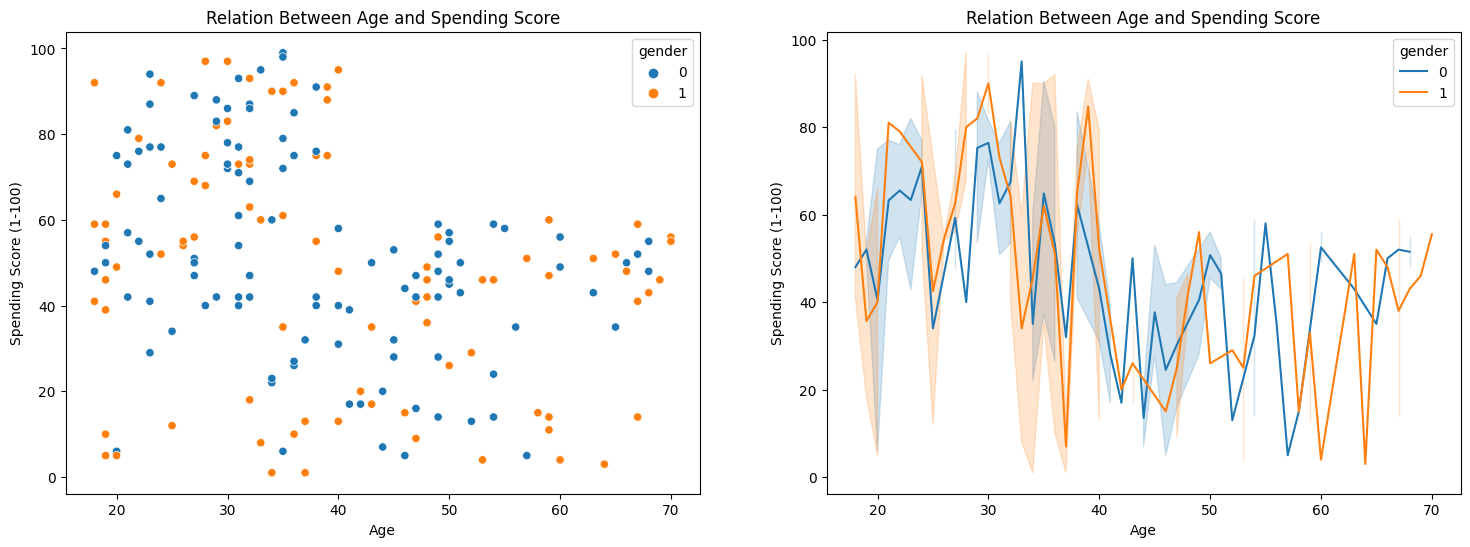

In [124]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Scatter plot
sns.scatterplot(x=data['Age'], y=data['Spending Score (1-100)'], hue=data["gender"], color="yellow", ax=axes[0])
axes[0].set_title("Relation Between Age and Spending Score")

# Line plot
sns.lineplot(x=data['Age'], y=data['Spending Score (1-100)'], hue=data["gender"], color="yellow", ax=axes[1])
axes[1].set_title("Relation Between Age and Spending Score")

plt.show()
# In this corrected code, we use axes[0] and axes[1] to access the first and second subplots, respectively. We also added titles to each subplot using set_title.

# This code will display two side-by-side subplots, one with a scatter plot and the other with a line plot, showing the relationship between 'Age' and 'Spending Score (1-100)' with different colors for each gender.


## find Spending Score where Age is lesser or Equal to 20

In [110]:
data[data['Age'] <= 20][['Age', 'Spending Score (1-100)']].sort_values(by='Age', ascending=True)


,Age,Spending Score (1-100)
91,18,41
114,18,48
33,18,92
65,18,59
115,19,50
113,19,46
111,19,54
138,19,10
0,19,39
61,19,55


## Find Annual Income where where income greater or equal to 100k$

In [114]:
data[data['Annual Income (k$)']>=100][['Age','Annual Income (k$)']].sort_values(by="Age",ascending=True)

,Age,Annual Income (k$)
187,28,101
199,30,137
191,32,103
197,32,126
198,32,137
192,33,113
190,34,103
195,35,120
189,36,103
193,38,113


In [112]:
data

,gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


## Elbow Method 

- The elbow method is a popular technique used in unsupervised machine learning, particularly in clustering algorithms like k-means, to determine the optimal number of clusters (k) for a dataset. The method aims to find the "elbow point" in a plot of the within-cluster sum of squares (WCSS) against the number of clusters. WCSS represents the sum of squared distances between data points and their assigned cluster centroids.

The process of the elbow method can be summarized as follows:

- Compute the clustering algorithm (e.g., k-means) for different values of k (number of clusters).
For each value of k, calculate the WCSS by summing the squared distances of each data point to its assigned cluster centroid.
Plot the values of k against the corresponding WCSS.

- Examine the plot for an "elbow point," which is a sudden and significant drop in the WCSS curve.
The "elbow point" indicates the optimal number of clusters for the dataset. It represents the point where adding more clusters does not significantly reduce the WCSS.

- The rationale behind the elbow method is that as the number of clusters increases, the WCSS will generally decrease because data points can be fitted more closely to their respective centroids. However, beyond a certain number of clusters, the reduction in WCSS becomes less pronounced (forming an "elbow" shape), and adding more clusters may not provide substantial benefits in terms of improved clustering quality. The elbow point represents a balance between the compactness of clusters and the simplicity of the model.

- Researchers and data analysts often use the elbow method as a heuristic to select the optimal number of clusters, but it is essential to combine it with domain knowledge and other evaluation metrics to make a more informed decision. Additionally, in certain cases, the data may not exhibit a clear elbow point, making the selection of the optimal number of clusters more subjective.

- The elbow method is a popular technique used in unsupervised machine learning, particularly in clustering algorithms like k-means, to determine the optimal number of clusters (k) for a dataset. The method aims to find the "elbow point" in a plot of the within-cluster sum of squares (WCSS) against the number of clusters. WCSS represents the sum of squared distances between data points and their assigned cluster centroids.

The process of the elbow method can be summarized as follows:

- Compute the clustering algorithm (e.g., k-means) for different values of k (number of clusters).
For each value of k, calculate the WCSS by summing the squared distances of each data point to its assigned cluster centroid.
Plot the values of k against the corresponding WCSS.

- Examine the plot for an "elbow point," which is a sudden and significant drop in the WCSS curve.
The "elbow point" indicates the optimal number of clusters for the dataset. It represents the point where adding more clusters does not significantly reduce the WCSS.

- The rationale behind the elbow method is that as the number of clusters increases, the WCSS will generally decrease because data points can be fitted more closely to their respective centroids. However, beyond a certain number of clusters, the reduction in WCSS becomes less pronounced (forming an "elbow" shape), and adding more clusters may not provide substantial benefits in terms of improved clustering quality. The elbow point represents a balance between the compactness of clusters and the simplicity of the model.

- Researchers and data analysts often use the elbow method as a heuristic to select the optimal number of clusters, but it is essential to combine it with domain knowledge and other evaluation metrics to make a more informed decision. Additionally, in certain cases, the data may not exhibit a clear elbow point, making the selection of the optimal number of clusters more subjective.

In [32]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(data)
    wcss.append(km.inertia_)

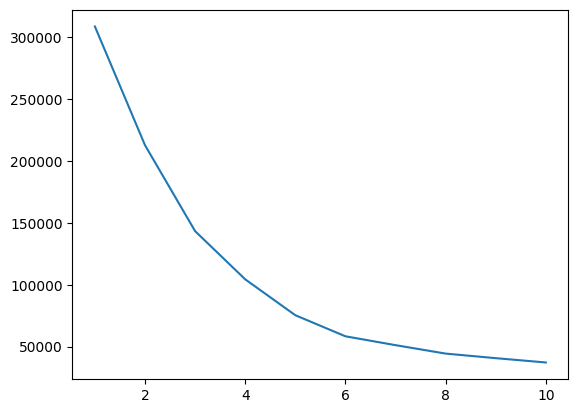

In [33]:
plt.plot(range(1,11),wcss)

## MODEL_TRAINING

In [34]:
X = data.iloc[:,:].values
kmean = KMeans(n_clusters=6)
y_means = kmean.fit_predict(X)

-  k-means clustering algorithm to perform cluster analysis on a dataset represented by the variable data. Here's a step-by-step description of the code:
- 
X = data.iloc[:, :].values: This line of code extracts the values from the entire DataFrame data and assigns them to the variable X. The variable X now represents the dataset that will be used for clustering. The iloc function is used to access the data based on integer location, and [:, :] selects all rows and all columns of the DataFrame.- 

kmean = KMeans(n_clusters=6): In this line, the k-means clustering algorithm is initialized with the number of clusters set to 6. The k-means algorithm aims to partition the data into k clusters, and n_clusters=6 specifies that we want to create 6 clusters. The variable kmean is now an instance of the KMeans class, configured to perform clustering with 6 cluster- s.

y_means = kmean.fit_predict(X): This line performs the actual clustering process. The fit_predict method of the KMeans class is used to fit the model to the data (X) and predict the cluster labels for each data point. The resulting cluster labels are stored in the variable y_means. Each element of y_means represents the cluster assignment of the corresponding data point i- n X.

In summary, the provided code uses k-means clustering to group the data points in the data DataFrame into 6 distinct clusters based on their features. The cluster assignments for each data point are stored in the y_means variable. After running this code, you can use the cluster assignments to analyze and interpret the characteristics of each cluster and gain insights from the data's natural grouping patterns.

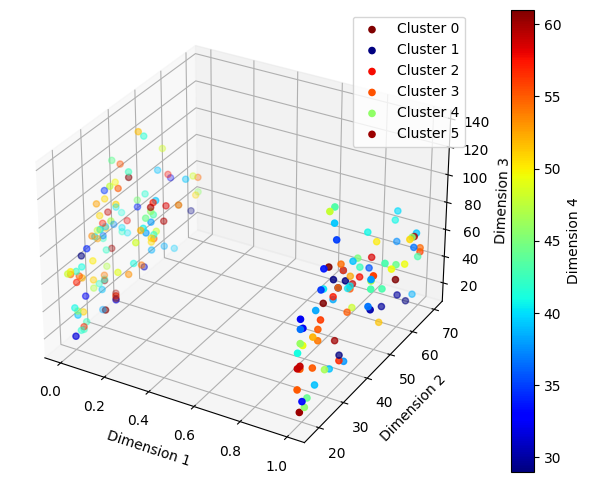

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have a 4-dimensional dataset X and cluster labels y_means
# X should be a NumPy array or a Pandas DataFrame

# Create a 3D figure
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the first three dimensions (X[:, 0], X[:, 1], X[:, 2])
# Color the data points based on the fourth dimension (X[:, 3])
# Use the 'jet' colormap to represent the fourth dimension
sc = ax.scatter(X[y_means == 0, 0], X[y_means == 0, 1], X[y_means == 0, 2], c=X[y_means == 0, 3], cmap='jet', label='Cluster 0')
ax.scatter(X[y_means == 1, 0], X[y_means == 1, 1], X[y_means == 1, 2], c=X[y_means == 1, 3], cmap='jet', label='Cluster 1')
ax.scatter(X[y_means == 2, 0], X[y_means == 2, 1], X[y_means == 2, 2], c=X[y_means == 2, 3], cmap='jet', label='Cluster 2')
ax.scatter(X[y_means == 3, 0], X[y_means == 3, 1], X[y_means == 3, 2], c=X[y_means == 3, 3], cmap='jet', label='Cluster 3')
ax.scatter(X[y_means == 4, 0], X[y_means == 4, 1], X[y_means == 4, 2], c=X[y_means == 4, 3], cmap='jet', label='Cluster 4')
ax.scatter(X[y_means == 5, 0], X[y_means == 5, 1], X[y_means == 5, 2], c=X[y_means == 5, 3], cmap='jet', label='Cluster 5')

# Add a color bar to show the mapping of the fourth dimension's values to colors
cbar = fig.colorbar(sc)
cbar.set_label('Dimension 4')

# Add labels to the axes
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')

# Add a legend to identify the clusters
ax.legend()

# Show the plot
plt.show()
